## Import libraries & Read datasets

Feel free to add code cells where necessary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

countries_continents = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Final/Countries_Continents.csv")
population = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Final/population.csv")
world_happiness = pd.read_csv("/Users/vaibhavrangan/Downloads/Stat_303-1/Final/world_happiness.csv")

In [2]:
countries_continents.head()

,Continent,Country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina Faso


In [3]:
population.head()

,Country name,Population
0,World,8091734930
1,India,1438069596
2,China[a],1422584933
3,United States,343477335
4,Indonesia,281190067


In [4]:
world_happiness.head(40)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.500,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.800,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.100,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.400,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.700,0.531,0.234,0.776,0.614,0.268
5,Afghanistan,2013,3.572,7.680,0.484,52.000,0.578,0.059,0.823,0.547,0.273
6,Afghanistan,2014,3.131,7.671,0.526,52.300,0.509,0.102,0.871,0.492,0.375
7,Afghanistan,2015,3.983,7.654,0.529,52.600,0.389,0.078,0.881,0.491,0.339
8,Afghanistan,2016,4.220,7.650,0.559,52.925,0.523,0.040,0.793,0.501,0.348
9,Afghanistan,2017,2.662,7.648,0.491,53.250,0.427,-0.123,0.954,0.435,0.371


if you run into issue when reading the data, add `encoding='unicode_escape'` to resolve it

## Q25

In [5]:
# rename world_happiness country to column to match with country_continents
world_happiness = world_happiness.rename(columns={'Country name': 'Country'})
# merge world_happiness and countries_continents
merged = pd.merge(world_happiness, countries_continents, on='Country')

print(merged["Continent"].nunique(), merged["Country"].nunique())

6 164


## Q26

In [6]:
missing_vals = merged.isna().sum().sum()
missing_vals

374

Q26 Step 1

In [7]:
data_imputed1 = merged.copy()
data_imputed1.set_index('Country', inplace=True)
data_imputed1 = data_imputed1.groupby('Country').transform(lambda x: x.fillna(x.mean()))
data_imputed1.reset_index(inplace=True)
data_imputed1.isna().sum().sum()

90

In [8]:
data_imputed1.head()

,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


Q26 Step 2

In [9]:
data_imputed2 = data_imputed1.copy()
data_imputed2.iloc[:, 1:] = data_imputed2.iloc[:, 1:].apply(lambda x: x.fillna(x.median()), axis=0)
data_imputed2.head()

,Country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [10]:
data_imputed2.isna().sum().sum()

0

## Q27

In [11]:
# group by country and year and aggregate Life Ladder
grouped = data_imputed2.groupby(['Country', 'year']).agg({'Life Ladder': 'mean'}).reset_index()

# find the difference between each country's Life Ladder between teh most recent year of measurement and the first year of measurement
diff = grouped.groupby('Country').agg({'Life Ladder': lambda x: x.iloc[-1] - x.iloc[0]}).reset_index()

# find the number of countries with positive and negative Life Ladder change
positive = diff[diff['Life Ladder'] > 0].shape[0]
negative = diff[diff['Life Ladder'] < 0].shape[0]

print(positive, negative)

# find country  with biggest increase and biggest decrase
biggest_increase = diff[diff['Life Ladder'] == diff['Life Ladder'].max()].Country.values[0]
biggest_decrease = diff[diff['Life Ladder'] == diff['Life Ladder'].min()].Country.values[0]

print(biggest_increase, biggest_decrease)

93 66
Nicaragua Afghanistan


## Q28

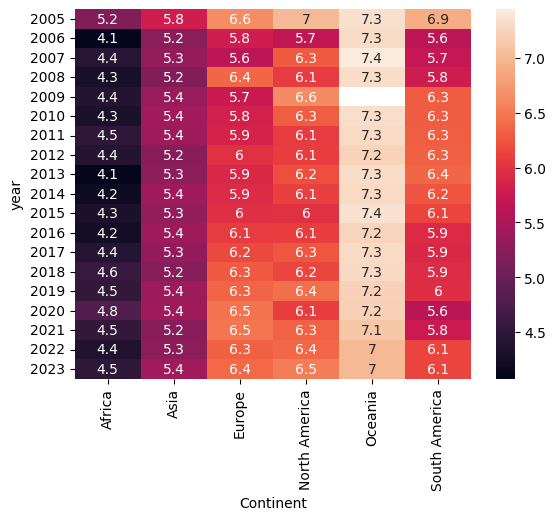

In [12]:
# merge data_imputed2 and continent from countries_and_continents
merged = pd.merge(data_imputed2, countries_continents, on='Country')

# group by continent and year and aggregate Life Ladder
grouped2 = merged.groupby(['Continent', 'year']).agg({'Life Ladder': 'mean'}).reset_index()

# Create the heatmap of the Life Ladder over the years for each continent
sns.heatmap(grouped2.pivot(index='year', columns='Continent', values='Life Ladder'), annot=True);

## Q29

In [13]:
# calculate each country's average Life Ladder over the years
grouped3 = data_imputed2.groupby('Country').agg({'Life Ladder': 'mean'}).reset_index()
# rename Life Ladder to "Average Life Ladder"
grouped3.rename(columns={'Life Ladder': 'Average Life Ladder'}, inplace=True)
# merge with countries_and_continents
merged3 = pd.merge(grouped3, countries_continents, on='Country')
merged3.head()

,Country,Average Life Ladder,Continent
0,Afghanistan,3.219933,Asia
1,Albania,5.072750,Europe
2,Algeria,5.392000,Africa
3,Angola,4.420250,Africa
4,Argentina,6.289667,South America


In [14]:
import re

country_names_clean_population_data = lambda x: re.sub(r"[\(\[].*?[\)\]]", "", str(x)).strip()
population = population.applymap(country_names_clean_population_data)
population = population.rename(columns={'Country name': 'Country'})
population.head()

,Country,Population
0,World,8091734930
1,India,1438069596
2,China,1422584933
3,United States,343477335
4,Indonesia,281190067


In [15]:
merged4 = pd.merge(merged3, population, on='Country')
merged4.head()

,Country,Average Life Ladder,Continent,Population
0,Afghanistan,3.219933,Asia,41454761
1,Albania,5.072750,Europe,2811655
2,Algeria,5.392000,Africa,46164219
3,Angola,4.420250,Africa,36749906
4,Argentina,6.289667,South America,45538401


In [16]:
merged4["Population"] = merged4["Population"].astype(int)
# group by continent and aggregate by population and Average Life Ladder
grouped4 = merged4.groupby('Continent').agg({'Population': 'mean', 'Average Life Ladder': 'mean'}).reset_index()
grouped4.head()

,Continent,Population,Average Life Ladder
0,Africa,3.063838e+07,4.381740
1,Asia,1.108019e+08,5.351790
2,Europe,1.437297e+07,6.128492
3,North America,4.018172e+07,6.083132
4,Oceania,1.581198e+07,7.251559


## Q30: Bonus question

In [17]:
# slice merged dataframe to only include columns with numerical values and exclude year column
merged_num = merged.iloc[:, 2:11]
merged_num.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [18]:
from sklearn import impute

corr_matrix = merged_num.corr()
life_ladder_corr = corr_matrix["Life Ladder"].abs()
important_cols = corr_matrix[life_ladder_corr > 0.2].index

sliced = merged_num[important_cols]

imputer = impute.KNNImputer()
knn_imputed_data = imputer.fit_transform(sliced)

knn_imputed_df = pd.DataFrame(knn_imputed_data, columns=sliced.columns, index = sliced.index)

knn_imputed_df.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,Negative affect
0,3.724,7.350,0.451,50.5,0.718,0.882,0.414,0.258
1,4.402,7.509,0.552,50.8,0.679,0.850,0.481,0.237
2,4.758,7.614,0.539,51.1,0.600,0.707,0.517,0.275
3,3.832,7.581,0.521,51.4,0.496,0.731,0.480,0.267
4,3.783,7.661,0.521,51.7,0.531,0.776,0.614,0.268


In [25]:
knn_corr_matrix = knn_imputed_df.corr()
knn_life_ladder_corr = knn_corr_matrix["Life Ladder"].abs()
knn_life_ladder_corr.head(11)

Life Ladder                         1.000000
Log GDP per capita                  0.780998
Social support                      0.723281
Healthy life expectancy at birth    0.712364
Freedom to make life choices        0.533686
Perceptions of corruption           0.447725
Positive affect                     0.515037
Negative affect                     0.354913
Name: Life Ladder, dtype: float64

In [23]:
life_ladder_corr.head(11)

Life Ladder                         1.000000
Log GDP per capita                  0.780998
Social support                      0.723281
Healthy life expectancy at birth    0.712364
Freedom to make life choices        0.533686
Generosity                          0.178203
Perceptions of corruption           0.447725
Positive affect                     0.515037
Negative affect                     0.354913
Name: Life Ladder, dtype: float64

In [26]:
original_corr = merged_num.corr()["Life Ladder"]
imputed_corr = knn_imputed_df.corr()["Life Ladder"]
correlation_change = imputed_corr - original_corr  # Difference in correlations
columns_with_increase = correlation_change[correlation_change > 0].index.tolist()

# Count the number of columns with increased correlation
num_increased_columns = len(columns_with_increase)
print(num_increased_columns)


0
